In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

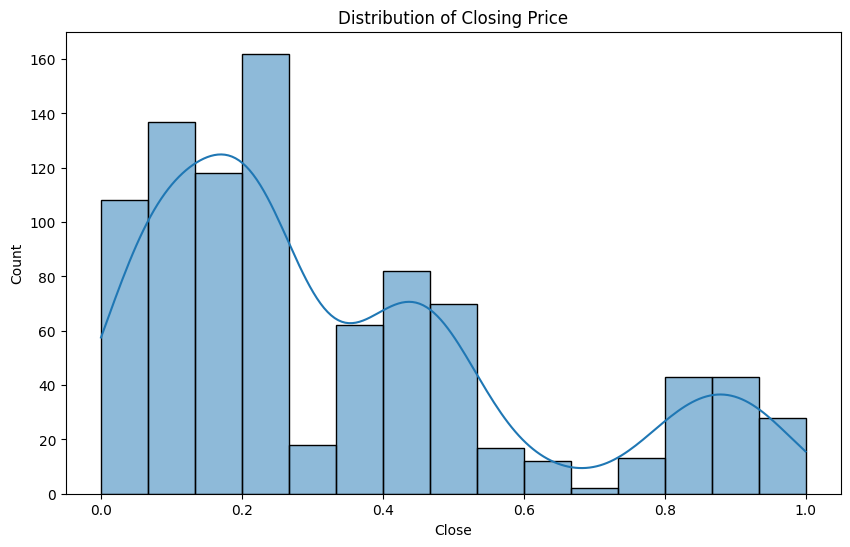

In [2]:
merged_df = pd.read_csv(r'C:\Users\Administrator\Desktop\DSP391m_cryptocurrency-price-prediction\data\dataset\processed_dataset.csv')


# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Close'], kde=True)
plt.title('Distribution of Closing Price')
plt.show()


In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           915 non-null    object 
 1   Open                           915 non-null    float64
 2   High                           915 non-null    float64
 3   Low                            915 non-null    float64
 4   Close                          915 non-null    float64
 5   Change                         915 non-null    float64
 6   Amplitude                      915 non-null    float64
 7   MA(7)                          915 non-null    float64
 8   MA(25)                         915 non-null    float64
 9   MA(99)                         915 non-null    float64
 10  Vol(USDT)                      915 non-null    float64
 11  RSI                            915 non-null    float64
 12  Ensemble_Sentiment             915 non-null    flo

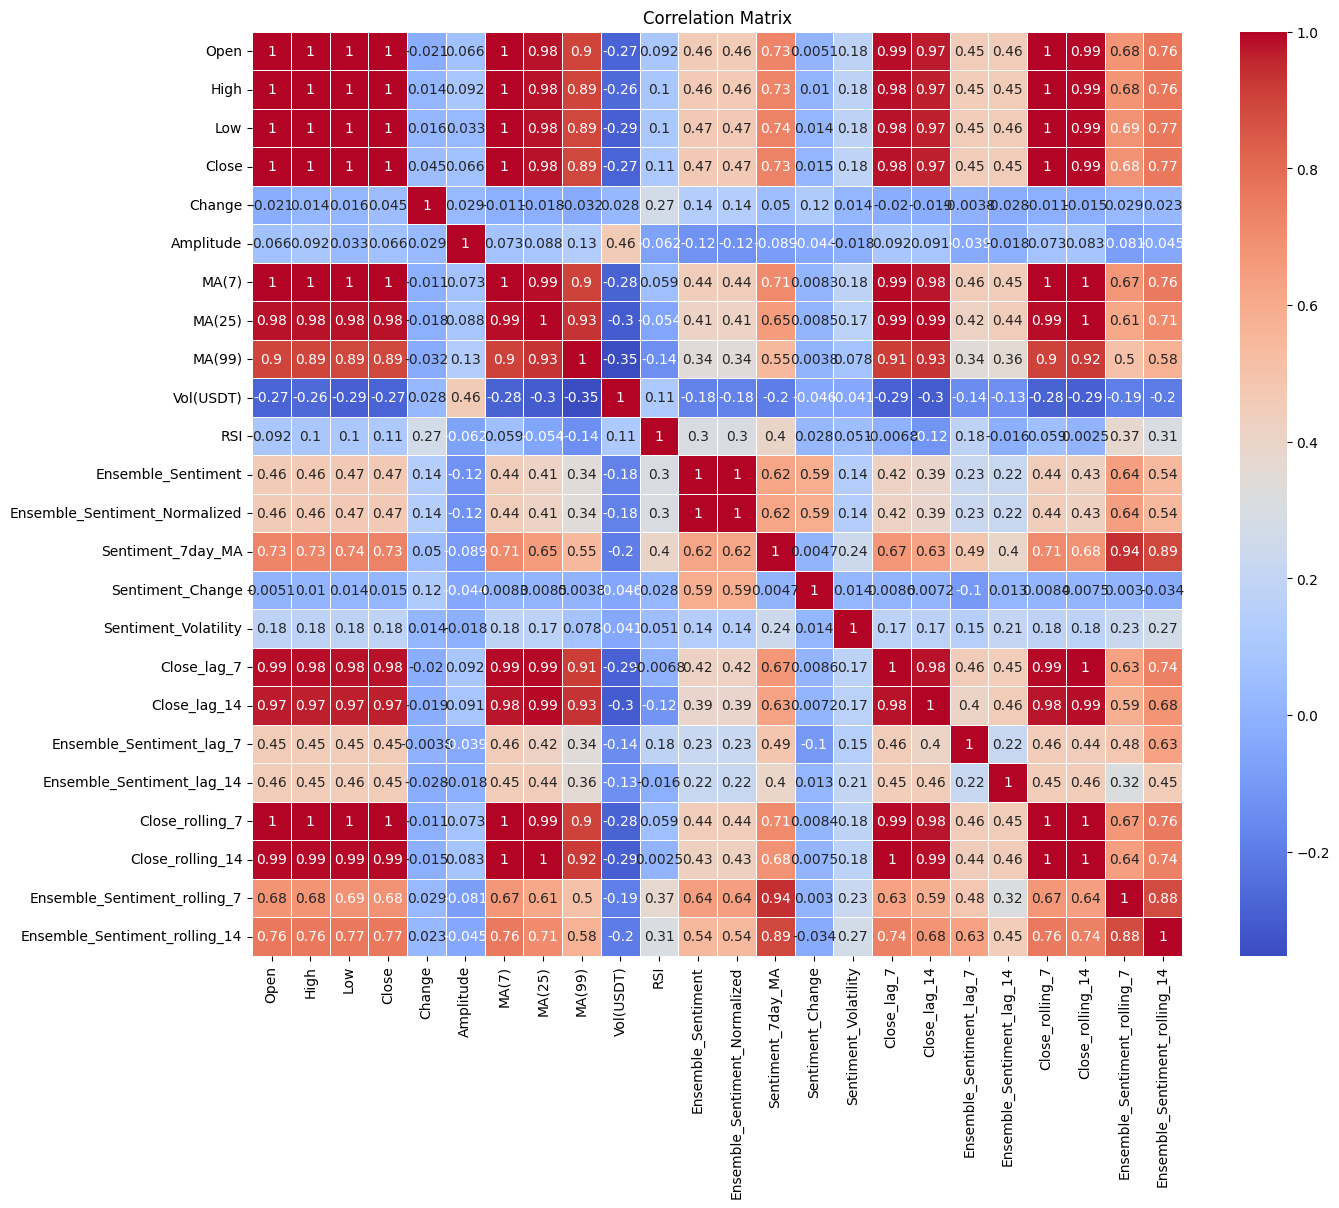

In [4]:
# Correlation between numerical variables
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
corr_matrix = merged_df[numeric_cols].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


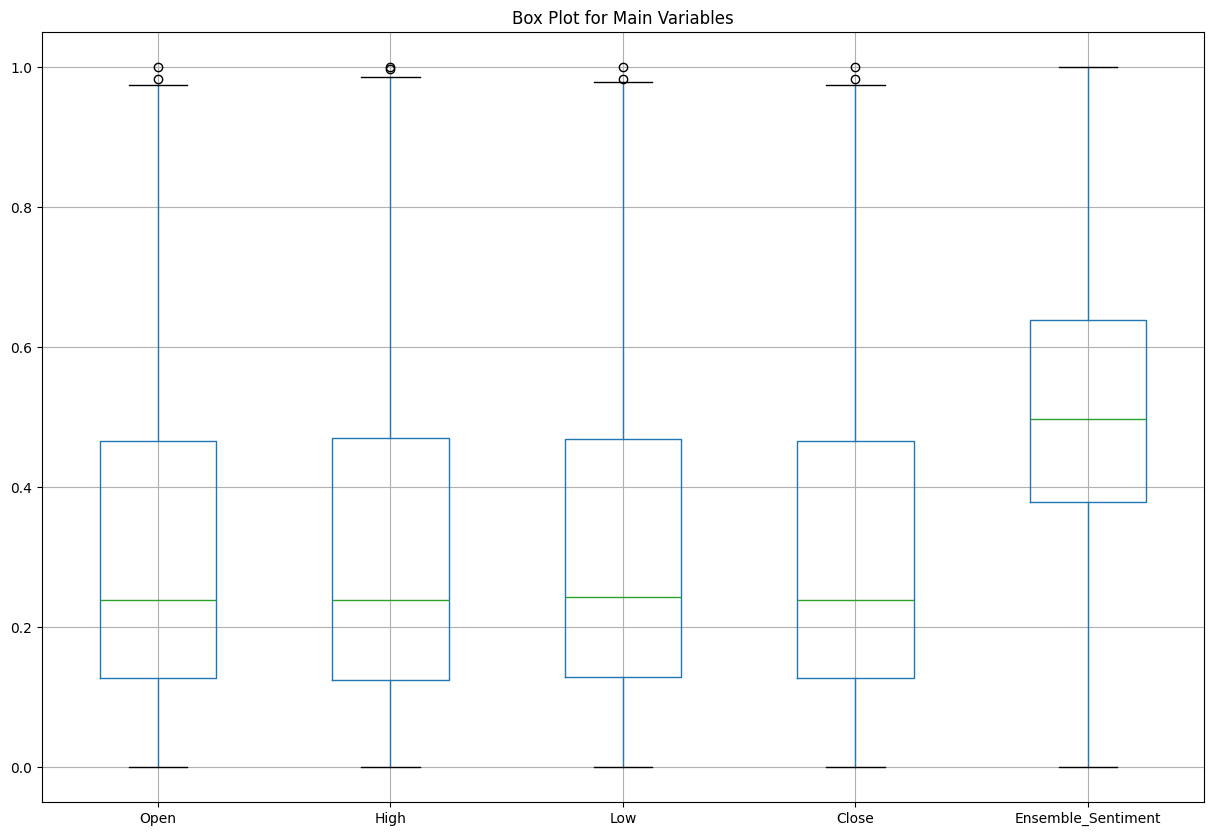

In [5]:
# Box plot for main variables
main_features = ['Open', 'High', 'Low', 'Close', 'Ensemble_Sentiment']
plt.figure(figsize=(15, 10))
merged_df[main_features].boxplot()
plt.title('Box Plot for Main Variables')
plt.show()

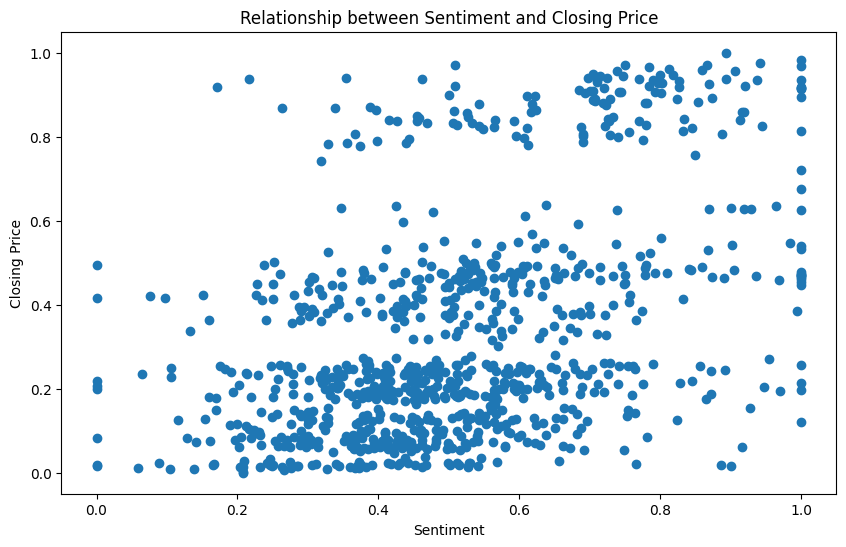

In [6]:
# 10. Relationship between price and sentiment
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Ensemble_Sentiment'], merged_df['Close'])
plt.title('Relationship between Sentiment and Closing Price')
plt.xlabel('Sentiment')
plt.ylabel('Closing Price')
plt.show()

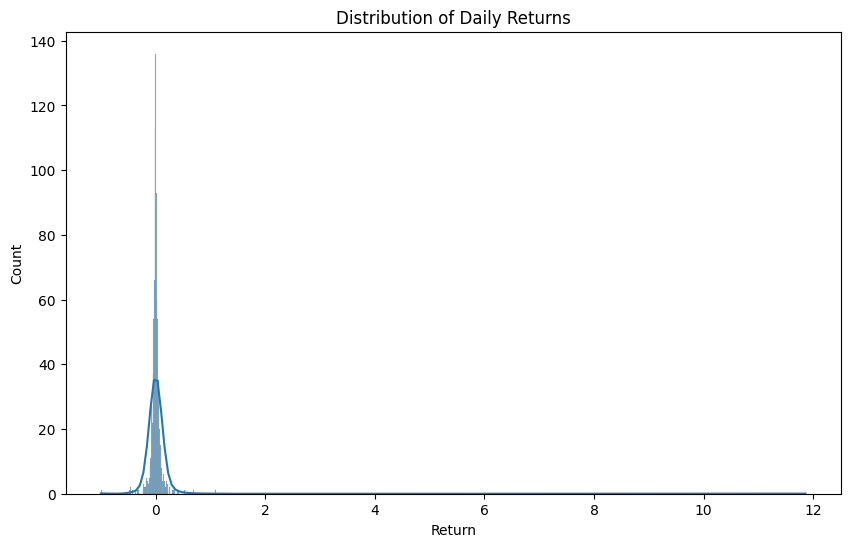

In [7]:
# Return Distribution Analysis
merged_df['Daily_Return'] = merged_df['Close'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Daily_Return'].dropna(), kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.show()

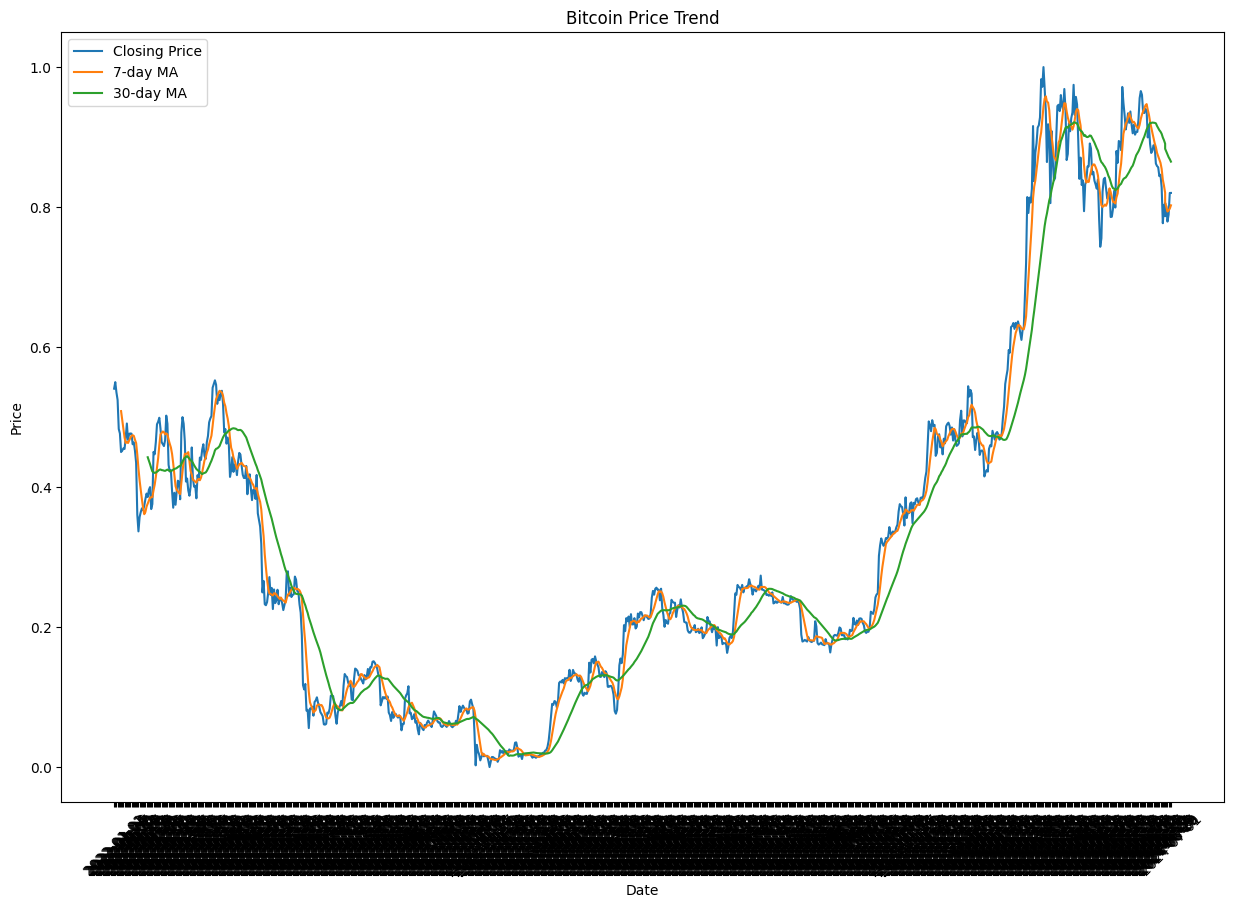

In [8]:
#  Trend Analysis
merged_df['MA_7'] = merged_df['Close'].rolling(window=7).mean()
merged_df['MA_30'] = merged_df['Close'].rolling(window=30).mean()

plt.figure(figsize=(15, 10))
plt.plot(merged_df['Date'], merged_df['Close'], label='Closing Price')
plt.plot(merged_df['Date'], merged_df['MA_7'], label='7-day MA')
plt.plot(merged_df['Date'], merged_df['MA_30'], label='30-day MA')
plt.title('Bitcoin Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()